In [28]:
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [29]:
def project_2d(
  img_width: float,
  img_height: float,
  bbox_3d: np.array,
):

  x_min = np.min(bbox_3d[:, 0])
  x_max = np.max(bbox_3d[:, 0])
  y_min = np.min(bbox_3d[:, 1])
  y_max = np.max(bbox_3d[:, 1])
  
  x_min = max(0, x_min)
  y_min = max(0, y_min)
  x_max = min(img_width, x_max)
  y_max = min(img_height, y_max)

  return int(x_min), int(x_max), int(y_min), int(y_max)

In [30]:
img_path = "ai/datasets/a9_dataset_r01_s01/_images/s040_camera_basler_north_16mm/1607511137_552725296_s040_camera_basler_north_16mm.png"
label_path = "ai/datasets/a9_dataset_r01_s01/_labels/s040_camera_basler_north_16mm/1607511137_552725296_s040_camera_basler_north_16mm.json"

In [35]:
img = cv2.imread(img_path)
label = json.load(open(label_path, 'r'))

In [38]:
label

{'image_file_name': '1607511137_552725296_s040_camera_basler_north_16mm.jpg',
 'labels': [{'attributes': {'Body Color': {'value': 'White'},
    'Number of Trailers': {'value': '0'},
    'Occluded': {'value': 'PARTIALLY_OCCLUDED'},
    'Truck Type': {'value': 'Delivery Truck'}},
   'category': 'Truck',
   'id': 'd5a78079-a214-4baf-a7af-4c6ba01ceb14',
   'box3d_projected': {'bottom_left_front': [379.88736, 51.354],
    'bottom_left_back': [380.91839999999996, 46.0932],
    'bottom_right_back': [403.71456, 46.0932],
    'bottom_right_front': [403.69536, 51.354],
    'top_left_front': [379.88736, 20.298],
    'top_left_back': [380.91839999999996, 16.357200000000002],
    'top_right_back': [403.71456, 16.357200000000002],
    'top_right_front': [403.69536, 20.298]}},
  {'attributes': {'Body Color': {'value': 'Black'},
    'Number of Trailers': {'value': '0'},
    'Occluded': {'value': 'NOT_OCCLUDED'}},
   'category': 'Car',
   'id': '77f4cedd-09af-41b4-a696-0921df46d427',
   'box3d_projecte

In [36]:
for l in label['labels']:
  x_min, x_max, y_min, y_max = project_2d(img.shape[1], img.shape[0], np.array(list(l['box3d_projected'].values())))
  cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

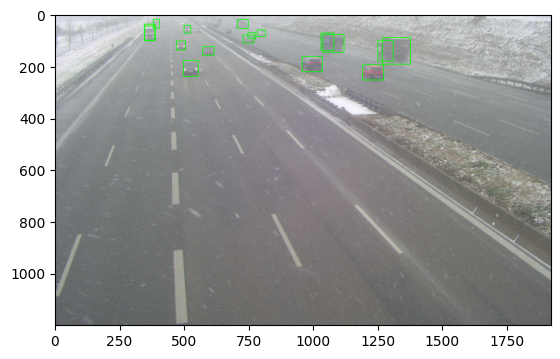

In [37]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()